Welcome
-------


Welcome to the Apache Spark tutorial notebooks.

This very simple notebook is designed to test that your environment is setup correctly.

Please `Run All` cells. 

The notebook should run without errors and you should see a histogram plot at the end.


#### Let's go


Let's check that there are some input data available:

In [1]:
%%sh

head -n 10 data/prince_by_machiavelli.txt

﻿The Project Gutenberg EBook of The Prince, by Nicolo Machiavelli

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: The Prince



Let's check if spark is available and what version are we using (should be 2.1+):

In [2]:
spark.version

u'2.1.0'

Let's try to run a simple spark program to compute the number of occurences od words in Machiavelli's "Prince", and display 10 most frequent ones:

In [3]:
import operator
import re


wordCountRDD = sc.textFile('data/prince_by_machiavelli.txt') \
        .flatMap(lambda line: re.split(r'[^a-z\-\']+', line.lower())) \
        .filter(lambda word: len(word) > 0 ) \
        .map(lambda word: (word, 1)) \
        .reduceByKey(operator.add)
        
top10Words = wordCountRDD \
    .map(lambda (k,v):(v,k)) \
    .sortByKey(False) \
    .take(10)
    
print(top10Words)

[(3108, u'the'), (2107, u'to'), (1935, u'and'), (1802, u'of'), (993, u'in'), (920, u'he'), (779, u'a'), (745, u'that'), (640, u'his'), (585, u'it')]


Let's use Spark SQL to display a table with the 10 lest frequent words:

In [4]:
wordCountDF = spark.createDataFrame(wordCountRDD, ['word', 'count'])
bottom10Words = wordCountDF.sort('count').limit(10)
display(bottom10Words)

,word,count
0,secondly,1
1,surrounding,1
2,consolidated,1
3,comparatively,1
4,chill,1
5,prospering,1
6,calculate,1
7,attracted,1
8,similarity,1
9,popoli,1


Let's save the results to a csv file in the output directory:

In [5]:
wordCountDF.write.csv('output/prince-word-count.csv', mode='overwrite', header=True)

Let's preview the output:

In [6]:
%%sh 

cat output/prince-word-count.csv/*.csv | head -n 10

word,count
pardon,2
dissolution,2
desirable,2
papacy,1
four,14
demanded,1
protest,1
thirst,1
consists,2


Let's use maptplotlib to plot the histogram of the distribution of word counts:

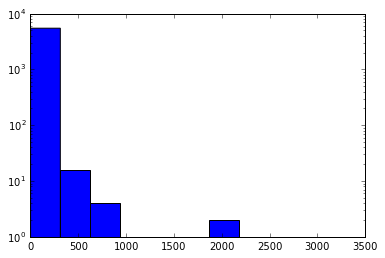

In [7]:
import matplotlib.pyplot as plt

wordCountPDF = wordCountDF.toPandas()
plt.hist(wordCountPDF['count'], bins = 10, log = True)
plt.show()
display()